In [15]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Import the Packages**

In [16]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,auc,roc_auc_score
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score

**Import the Dataset**

In [17]:
cc = pd.read_csv('/content/drive/My Drive/Colab Notebooks/credit_fraud.csv')
cc.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


**Check the columns present in the dataset**

In [18]:
cc.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

**Check the shape of the dataset**

In [19]:
cc.shape

(10000, 31)

**Check the descriptive statistics of the given dataset**

In [20]:
cc.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,5966.033400,-0.241862,0.281949,0.906270,0.264148,-0.046398,0.133108,-0.071689,-0.064778,0.802224,-0.222998,0.766066,-1.272513,0.851410,0.700597,-0.129634,-0.007757,0.318991,-0.016074,-0.070415,0.027511,-0.051990,-0.152671,-0.033268,0.021335,0.087146,0.108140,0.005518,0.002915,63.030188,0.00380
std,4473.403739,1.521679,1.308139,1.159154,1.441235,1.182935,1.307311,1.077430,1.259064,1.155198,1.093548,1.168600,1.527660,1.213055,1.239290,0.975573,0.882057,0.966392,0.794259,0.808373,0.589994,0.913811,0.631083,0.487814,0.594430,0.428171,0.562793,0.410868,0.266247,184.486158,0.06153
min,0.000000,-27.670569,-34.607649,-15.496222,-4.657545,-32.092129,-23.496714,-26.548144,-23.632502,-6.329801,-13.193415,-2.595325,-17.769143,-3.389510,-19.214325,-4.152532,-12.227189,-18.587366,-6.920762,-4.932733,-13.276034,-11.468435,-8.527145,-15.144340,-2.512377,-2.577363,-1.338556,-7.976100,-3.509250,0.000000,0.00000
25%,2072.750000,-1.013283,-0.208342,0.412799,-0.614424,-0.643390,-0.629934,-0.542336,-0.190747,0.070868,-0.688422,-0.063689,-2.368115,-0.017984,0.080400,-0.709531,-0.495536,-0.180029,-0.450302,-0.552134,-0.149981,-0.268120,-0.549638,-0.174120,-0.327817,-0.158137,-0.327974,-0.084489,-0.015753,5.000000,0.00000
50%,4563.500000,-0.372799,0.288524,0.944361,0.219861,-0.152769,-0.152566,-0.055585,0.012865,0.805275,-0.340720,0.746752,-1.621015,0.919134,0.899792,-0.010078,0.066086,0.297423,0.025225,-0.077208,-0.021415,-0.123273,-0.136746,-0.045794,0.079976,0.121001,0.042865,-0.004568,0.015897,15.950000,0.00000
75%,10233.250000,1.150864,0.901879,1.602903,1.125666,0.371081,0.505357,0.476280,0.274533,1.506299,0.174295,1.576540,0.082667,1.768889,1.499211,0.533501,0.547399,0.782865,0.459390,0.442908,0.156534,0.032707,0.247490,0.081665,0.410877,0.359058,0.476394,0.120811,0.077182,50.960000,0.00000
max,15012.000000,1.960497,8.636214,4.101716,10.463020,34.099309,21.393069,34.303177,5.060381,10.392889,12.259949,12.018913,3.774837,4.465413,5.748734,3.635042,4.087802,7.893393,4.115560,4.555359,8.012574,22.588989,4.534454,13.876221,3.200201,5.525093,3.517346,8.254376,4.860769,7712.430000,1.00000


**Check the info of the dataset**

In [21]:
cc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    10000 non-null  int64  
 1   V1      10000 non-null  float64
 2   V2      10000 non-null  float64
 3   V3      10000 non-null  float64
 4   V4      10000 non-null  float64
 5   V5      10000 non-null  float64
 6   V6      10000 non-null  float64
 7   V7      10000 non-null  float64
 8   V8      10000 non-null  float64
 9   V9      10000 non-null  float64
 10  V10     10000 non-null  float64
 11  V11     10000 non-null  float64
 12  V12     10000 non-null  float64
 13  V13     10000 non-null  float64
 14  V14     10000 non-null  float64
 15  V15     10000 non-null  float64
 16  V16     10000 non-null  float64
 17  V17     10000 non-null  float64
 18  V18     10000 non-null  float64
 19  V19     10000 non-null  float64
 20  V20     10000 non-null  float64
 21  V21     10000 non-null  float64
 22 

**Check for the missing value present in the dataset**

In [22]:
cc.isnull().sum().any()

False

**Check the class variable using pie chart**

Class as pie chart:


Text(0, 0.5, '')

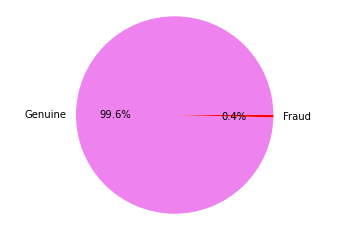

In [23]:
# Check Class variables that has 0 value for Genuine transactions and 1 for Fraud
print("Class as pie chart:")
fig, ax = plt.subplots(1, 1)
ax.pie(cc.Class.value_counts(),autopct='%1.1f%%', labels=['Genuine','Fraud'], colors=['violet','r'])
plt.axis('equal')
plt.ylabel('')

**Plot histogram to see if there is any trend in Time variable**

Time variable
9995    4.166944
9996    4.167778
9997    4.168889
9998    4.169444
9999    4.170000
Name: Time_Hr, dtype: float64


Text(0, 0.5, '# transactions')

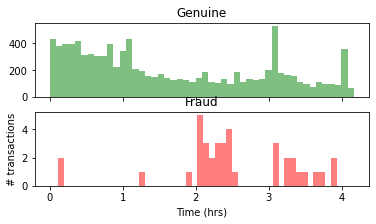

In [24]:
#plot Time to see if there is any trend
print("Time variable")
cc["Time_Hr"] = cc["Time"]/3600 # convert to hours
print(cc["Time_Hr"].tail(5))
fig, (ax1, ax2) = plt.subplots(2, 1, sharex = True, figsize=(6,3))
ax1.hist(cc.Time_Hr[cc.Class==0],bins=48,color='g',alpha=0.5)
ax1.set_title('Genuine')
ax2.hist(cc.Time_Hr[cc.Class==1],bins=48,color='r',alpha=0.5)
ax2.set_title('Fraud')
plt.xlabel('Time (hrs)')
plt.ylabel('# transactions')

**Observations:**

This "Time" feature shows that rate of transactions is picking up during day time. But number of transactions have almost similar dependence on time of the day for both the classes. So, I believe this feature does not yield any predictive power to distinguish between the two classes. But ofcourse we will later test this assumption. For now, I'll keep this feature in data frame. We will drop "Time".

In [25]:
cc.drop(['Time'], axis=1)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Time_Hr
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0.000000
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0.000000
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0.000278
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0.000278
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0.000556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.178755,0.596025,0.074131,2.542393,0.450685,-0.179355,0.326365,-0.234949,0.473040,0.331248,-0.406853,-3.076411,1.421080,1.885435,-0.335264,0.700895,-0.076694,0.158451,-0.815829,-0.098736,-0.228112,-0.561559,-0.182781,-0.523241,0.667142,0.015699,-0.067238,0.008709,53.19,0,4.166944
9996,1.228455,0.049488,1.022099,0.386471,-0.973228,-1.067822,-0.383162,-0.205407,1.699304,-0.531014,0.950229,-2.357223,1.395353,1.606754,0.553204,0.429342,0.452575,-0.216733,-0.365549,-0.121607,-0.322912,-0.730294,0.205601,0.686302,-0.071008,0.729846,-0.092276,0.012277,12.18,0,4.167778
9997,-0.971734,0.744625,2.334822,-0.408046,-0.999231,-0.629294,-0.377212,0.481230,1.599496,-1.586419,0.107872,-2.325503,1.170943,1.271288,-1.118945,0.345479,0.722130,-0.026780,-0.641398,-0.263964,-0.116821,-0.141219,-0.026115,0.712719,-0.372964,0.750323,-0.107875,0.031272,4.05,0,4.168889
9998,-1.529666,1.475870,1.507624,-0.662935,-1.037152,-1.159860,-0.303219,0.745766,0.946896,-1.373455,0.433736,-2.364680,1.342560,2.038849,-0.099721,0.782406,0.567083,-0.049721,-0.862833,-0.239655,-0.197993,-0.634088,0.100631,0.669449,-0.269750,0.611964,-0.169789,0.007846,4.05,0,4.169444


**Plot histogram to check Amount variable**

Text(0, 0.5, '# transactions')

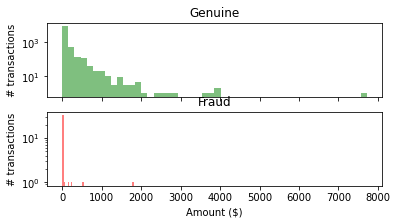

In [26]:
#let us check another feature Amount
fig, (ax3,ax4) = plt.subplots(2,1, figsize = (6,3), sharex = True)
ax3.hist(cc.Amount[cc.Class==0],bins=50,color='g',alpha=0.5)
ax3.set_yscale('log') # to see the tails
ax3.set_title('Genuine') # to see the tails
ax3.set_ylabel('# transactions')
ax4.hist(cc.Amount[cc.Class==1],bins=50,color='r',alpha=0.5)
ax4.set_yscale('log') # to see the tails
ax4.set_title('Fraud') # to see the tails
ax4.set_xlabel('Amount ($)')
ax4.set_ylabel('# transactions')

Interesting to note "all transaction amounts > 10K in Genuine Class only". Also this amount feature is not on same scale as principle components. So, I'll standardize the values of the 'Amount' feature using StandardScalar and save in data-frame for later use.

In [27]:
from sklearn.preprocessing import StandardScaler
cc['scaled_Amount'] = StandardScaler().fit_transform(cc['Amount'].values.reshape(-1,1))
cc = cc.drop(['Amount'],axis=1)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

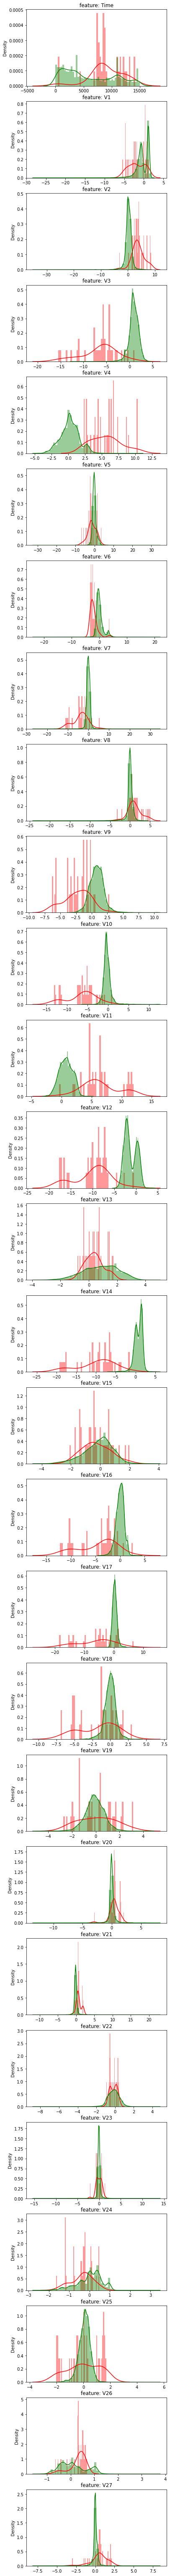

In [28]:
#let us check correlations and shapes of those 25 principal components.
# Features V1, V2, ... V28 are the principal components obtained with PCA.
import seaborn as sns
import matplotlib.gridspec as gridspec
gs = gridspec.GridSpec(28, 1)
plt.figure(figsize=(6,28*4))
for i, col in enumerate(cc[cc.iloc[:,0:28].columns]):
    ax5 = plt.subplot(gs[i])
    sns.distplot(cc[col][cc.Class == 1], bins=50, color='r')
    sns.distplot(cc[col][cc.Class == 0], bins=50, color='g')
    ax5.set_xlabel('')
    ax5.set_title('feature: ' + str(col))
plt.show()

For some of the features, both the classes have similar distribution. So, I don't expect them to contribute towards classifying power of the model. So, it's best to drop them and reduce the model complexity, and hence the chances of overfitting. Ofcourse as with my other assumptions, I will later check the validity of above argument.

**User defined function to split the dataset into train and test**

In [29]:
def split_data(cc, drop_list):
    cc = cc.drop(drop_list,axis=1)
    print(cc.columns)
    #test train split time
    from sklearn.model_selection import train_test_split
    y = cc['Class'].values #target
    X = cc.drop(['Class'],axis=1).values #features
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42, stratify=y)

    print("train-set size: ", len(y_train),
      "\ntest-set size: ", len(y_test))
    print("fraud cases in test-set: ", sum(y_test))
    return X_train, X_test, y_train, y_test

Below is funtion to define classifier and get predictions. We can use "predict()" method that checks whether a record should belong to "Fraud" or "Genuine" class. There is another method "predict_proba()" that gives the probabilities for each class. It helps us to learn the idea of changing the threshold that assigns an instance to class 1 or 0, thus we can control precision and recall scores. This would be used to calculate area under ROC.

**User defined function to fit and predict the model**

In [30]:
def get_predictions(clf, X_train, y_train, X_test):
    # create classifier
    clf = clf
    # fit it to training data
    clf.fit(X_train,y_train)
    # predict using test data
    y_pred = clf.predict(X_test)
    # Compute predicted probabilities: y_pred_prob
    y_pred_prob = clf.predict_proba(X_test)
    #for fun: train-set predictions
    train_pred = clf.predict(X_train)
    print('train-set confusion matrix:\n', confusion_matrix(y_train,train_pred)) 
    return y_pred, y_pred_prob

**User defined function to print the classifier score**

In [31]:
def print_scores(y_test,y_pred,y_pred_prob):
    print('test-set confusion matrix:\n', confusion_matrix(y_test,y_pred)) 
    print("recall score: ", recall_score(y_test,y_pred))
    print("precision score: ", precision_score(y_test,y_pred))
    print("f1 score: ", f1_score(y_test,y_pred))
    print("accuracy score: ", accuracy_score(y_test,y_pred))
    print("ROC AUC: {}".format(roc_auc_score(y_test, y_pred_prob[:,1])))

**Gaussian Naive Bayes:**

**Case-NB-1 : do not drop anything**

In [32]:
drop_list = []
X_train, X_test, y_train, y_test = split_data(cc, drop_list)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Class',
       'Time_Hr', 'scaled_Amount'],
      dtype='object')
train-set size:  8000 
test-set size:  2000
fraud cases in test-set:  8


In [33]:
y_pred, y_pred_prob = get_predictions(GaussianNB(), X_train, y_train, X_test)

train-set confusion matrix:
 [[7916   54]
 [   1   29]]


In [34]:
print_scores(y_test,y_pred,y_pred_prob)

test-set confusion matrix:
 [[1967   25]
 [   1    7]]
recall score:  0.875
precision score:  0.21875
f1 score:  0.35
accuracy score:  0.987
ROC AUC: 0.9921247489959839


**Case-NB-2 : drop some of principle components that have similar distributions in above plots**

In [35]:
drop_list = ['V28','V27','V26','V25','V24','V23','V22','V20','V15','V13','V8']
X_train, X_test, y_train, y_test = split_data(cc, drop_list)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V9', 'V10', 'V11',
       'V12', 'V14', 'V16', 'V17', 'V18', 'V19', 'V21', 'Class', 'Time_Hr',
       'scaled_Amount'],
      dtype='object')
train-set size:  8000 
test-set size:  2000
fraud cases in test-set:  8


In [36]:
y_pred, y_pred_prob = get_predictions(GaussianNB(), X_train, y_train, X_test)

train-set confusion matrix:
 [[7930   40]
 [   1   29]]


In [37]:
print_scores(y_test,y_pred,y_pred_prob)

test-set confusion matrix:
 [[1971   21]
 [   1    7]]
recall score:  0.875
precision score:  0.25
f1 score:  0.3888888888888889
accuracy score:  0.989
ROC AUC: 0.987230170682731


**Observations:**

Clearly, by removing some of the reduntant principle components, I gain in model sensitivity and precision.

**Case-NB-3 : drop some of principle components + Time**

In [38]:
drop_list = ['Time_Hr','V28','V27','V26','V25','V24','V23','V22','V20','V15','V13','V8']
X_train, X_test, y_train, y_test = split_data(cc, drop_list)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V9', 'V10', 'V11',
       'V12', 'V14', 'V16', 'V17', 'V18', 'V19', 'V21', 'Class',
       'scaled_Amount'],
      dtype='object')
train-set size:  8000 
test-set size:  2000
fraud cases in test-set:  8


In [39]:
y_pred, y_pred_prob = get_predictions(GaussianNB(), X_train, y_train, X_test)

train-set confusion matrix:
 [[7931   39]
 [   1   29]]


In [40]:
print_scores(y_test,y_pred,y_pred_prob)

test-set confusion matrix:
 [[1971   21]
 [   1    7]]
recall score:  0.875
precision score:  0.25
f1 score:  0.3888888888888889
accuracy score:  0.989
ROC AUC: 0.9859123995983936


**Observations:**

As we can see by comapring Case-NB-3 scores with Case-NB-2 scores, "Time_Hr" is not helping much in classification. So, I can remove it safely.

**Case-NB-4 : drop some of principle components + Time + 'scaled_Amount'**

In [41]:
drop_list = ['scaled_Amount','Time_Hr','V28','V27','V26','V25','V24','V23','V22','V20','V15','V13','V8']
X_train, X_test, y_train, y_test = split_data(cc, drop_list)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V9', 'V10', 'V11',
       'V12', 'V14', 'V16', 'V17', 'V18', 'V19', 'V21', 'Class'],
      dtype='object')
train-set size:  8000 
test-set size:  2000
fraud cases in test-set:  8


In [42]:
y_pred, y_pred_prob = get_predictions(GaussianNB(), X_train, y_train, X_test)

train-set confusion matrix:
 [[7926   44]
 [   1   29]]


In [43]:
print_scores(y_test,y_pred,y_pred_prob)

test-set confusion matrix:
 [[1968   24]
 [   0    8]]
recall score:  1.0
precision score:  0.25
f1 score:  0.4
accuracy score:  0.988
ROC AUC: 0.9982429718875502


**Observations:**

I would say, Case-NB-4 gives me better model sensitivity (or recall) and precision as compared to Case-NB-1. So dropping some of redundant feature will ofcourse helps to make calculations fast and gain senstivity.

In [44]:
cc = cc.drop(drop_list,axis=1)
print(cc.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V9', 'V10', 'V11',
       'V12', 'V14', 'V16', 'V17', 'V18', 'V19', 'V21', 'Class'],
      dtype='object')
